# Interactive illustration of logistic regression

## Check logistic and logit function

They are the same as 
`from scipy.special import logit, logistic`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

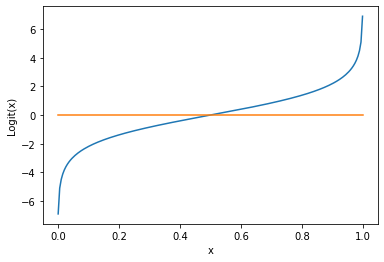

In [2]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0.001, 0.999, 200)
ax.plot(x, np.log(x/(1-x)));
ax.plot(x, 0*x)
plt.xlabel('x')
plt.ylabel('Logit(x)')
plt.show()

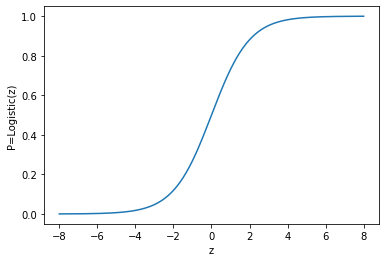

In [3]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-8, 8, 200)
ax.plot(x, np.exp(x)/(1+ np.exp(x)  ));
plt.xlabel('z')
plt.ylabel('P=Logistic(z)')
plt.show()

## Visualise logistic boundary

### Load package and generate data

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

ds = make_moons(noise=0.3, random_state=0)
X, y = ds

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

### Fit Logisitic regression

The predicted probability to be class 1 is:

$$P(y=1|X, W) = \sigma(w_0, x_1 * w_1 + ... + x_p * w_p)$$

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [6]:
clf.coef_, clf.intercept_

(array([[ 1.00485779, -1.64997314]]), array([-0.03005985]))

### Plot decision boundary

* Plotting codes are adapted from [scikit-learn examples](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) package.

* Change the values of w1 and w2 to see the change of decision boundary and accuracy in test set

In [7]:
# !pip install ipywidgets

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from matplotlib.colors import ListedColormap

def f(w1, w2):
    
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    
    # clf.intercept_ = np.array([0])
    clf.coef_ = np.array([[w1, w2]])
    
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    
    plt.figure(2)
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    
    contours = plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    contours = plt.contour(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.clabel(contours, fontsize=12, inline=False, fmt='%1.1f', colors='k')

    # Plot the training points
    plt.scatter(
        X_train[:, 0], X_train[:, 1], c=y_train, 
        cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    plt.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, 
        cmap=cm_bright, edgecolors="k", alpha=0.6,
    )
    plt.text(xx.max() - 0.2, yy.max() - 0.5,
             ("Acc=%.3f" % score).lstrip("0"),
             size=15, horizontalalignment="right"
            )
    plt.xlabel('w1')
    plt.ylabel('w2')
    
    plt.show()

interactive_plot = interactive(f, w1=(-3.0, 3.0, 0.1), w2=(-4, 4, 0.1))
output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w1', max=3.0, min=-3.0), FloatSlider(value=0.0, desc…